In [6]:
from Simulated_Annealing import SimulatedAnnealing
from utils import *
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from colors import colores
import functools

# Leer grafo

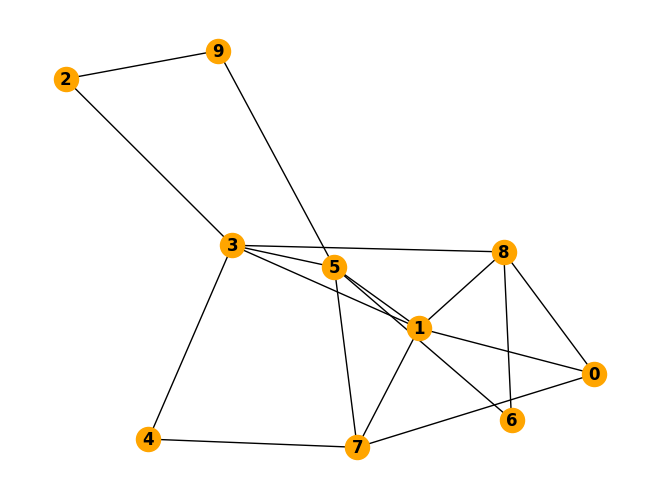

In [7]:
import csv
graph = []
with open('10nodos.csv', 'r', newline='') as file:
    myreader = csv.reader(file, delimiter=',')
    for row in myreader:
        # Convierte cada elemento de la fila en un entero
        int_row = [int(cell) for cell in row]
        graph.append(int_row)
graph = np.array(graph)
G = nx.from_numpy_array(graph)
nx.draw(G, with_labels=True, node_color='orange', font_weight='bold')
plt.show()

# Funcion de Costo

In [8]:

def graph_coloring(solucion, graph):
	"""graph_coloring Función Objetivo para el problema de Graph Coloring

	Parameters
	----------
	solucion : list[int]
		La solución a evaluar codificada de forma combinatoria. Es de tamaño neces
	graph : networkx.classes.graph.Graph
		Es la matriz de adyacencias del grafo a analizar

	Returns
	-------
	int
		Retorna el costo de la función
	"""
	ncolores=len(set(solucion))
	conflicts = 0
	for u, v in graph.edges():
		if solucion[u] == solucion[v]:
			conflicts += 1
	return conflicts + ncolores

fn = functools.partial(graph_coloring,graph =G)

# Experimento 1

In [9]:
parametros = {
    "problem_type": "COP",
    "codification": "combination",
    "cooling": "geometric",
    "min_or_max":"min",
    "limits": (1, 10),
    "precision": 1,
    "variables":1,
    "alpha": 0.99,
    "beta": 0.8,
    "time": 1,
    "equilibrium": 15,
    "temperature": 600,
    "final_temperature": 0.01,
}

# Prueba 1

16425 Epoch | Equilibrium 15 | Temperature 0.01 | Cost function: 4  | Aceptance : 0.0072

Tiempo de ejecución: 00:00:11
[6 1 1 6 9 9 1 7 7 7]


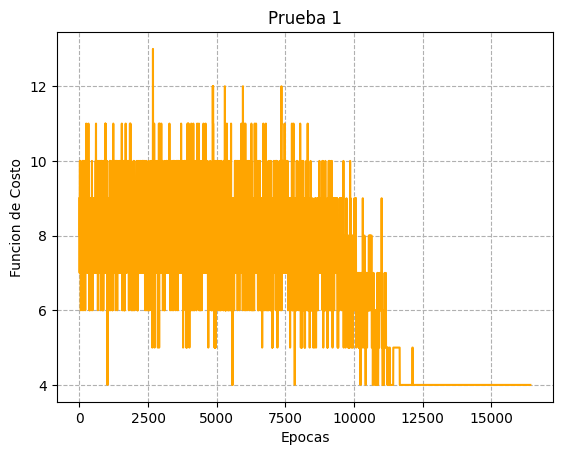

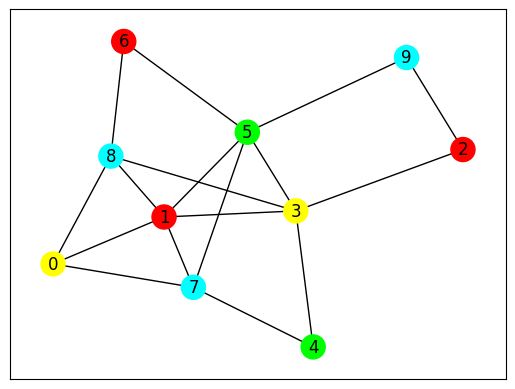

In [10]:
sa = SimulatedAnnealing(**parametros)
colors = sa.fit(fn)
print(colors)

plt.plot(range(len(sa.cost_)), [x for x in sa.cost_ ], color ='orange')
plt.title('Prueba 1')
plt.xlabel('Epocas')  # Agrega el nombre al eje X
plt.ylabel('Funcion de Costo') 
plt.grid(True, linestyle='dashed')
plt.show()

colors = [colores[numero] for numero in colors]
nx.draw_networkx(G, node_color=list(colors), with_labels=True)
plt.show()